In [6]:
import numpy as np
import scipy.sparse as sps
import porepy as pp
import math
import matplotlib.pyplot as plt

In [7]:
#Nx = Ny = 20
Nx=100
phys_dims = [1]
#phys_dims=[1,1]
#g = pp.CartGrid([Nx, Ny], phys_dims)
g=pp.CartGrid([Nx],phys_dims)
g.compute_geometry()

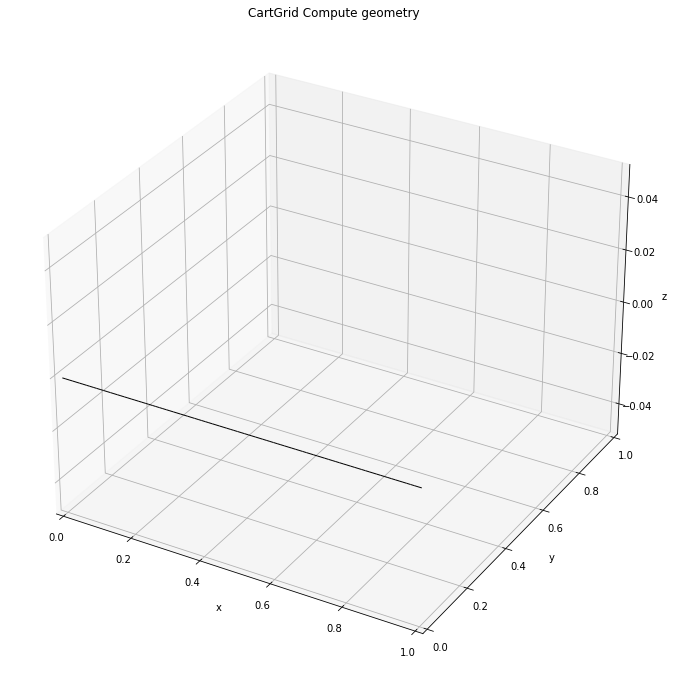

In [8]:
pp.plot_grid(g, figsize=(15, 12))

In [11]:
# Permeability
perm = pp.SecondOrderTensor(1e-7*np.ones(g.num_cells))                     

# Unitary scalar source already integrated in each cell
f = g.cell_volumes

#source= lambda x: 0.1
source= lambda x: math.sin(4*math.pi*x)
h=1/Nx
x=np.linspace(1/(2*Nx),1-1/(2*Nx),Nx)
f=np.zeros(Nx)
for i in range(Nx):
    f[i]=h*source(x[i])

# Boundary conditions
b_faces = g.tags['domain_boundary_faces'].nonzero()[0]
bc = pp.BoundaryCondition(g, b_faces, ['dir']*b_faces.size)
bc_val = np.zeros(g.num_faces)
bc_val[0]=1e6
bc_val[bc_val.size-1]=-800000.0

# Collect all parameters in a dictionary
parameters = {"second_order_tensor": perm, "source": f, "bc": bc, "bc_values": bc_val}

In [10]:
data_key = "flow"
data = pp.initialize_default_data(g, {}, data_key, parameters)

In [84]:
flow_discretization = pp.Tpfa(data_key)
flow_discretization.discretize(g, data)
A, b_flow = flow_discretization.assemble_matrix_rhs(g, data)

rhs_discretization = pp.ScalarSource(data_key)
rhs_discretization.discretize(g, data)
_, b_rhs = rhs_discretization.assemble_matrix_rhs(g, data)

p_tpfa = sps.linalg.spsolve(A, b_flow+b_rhs)

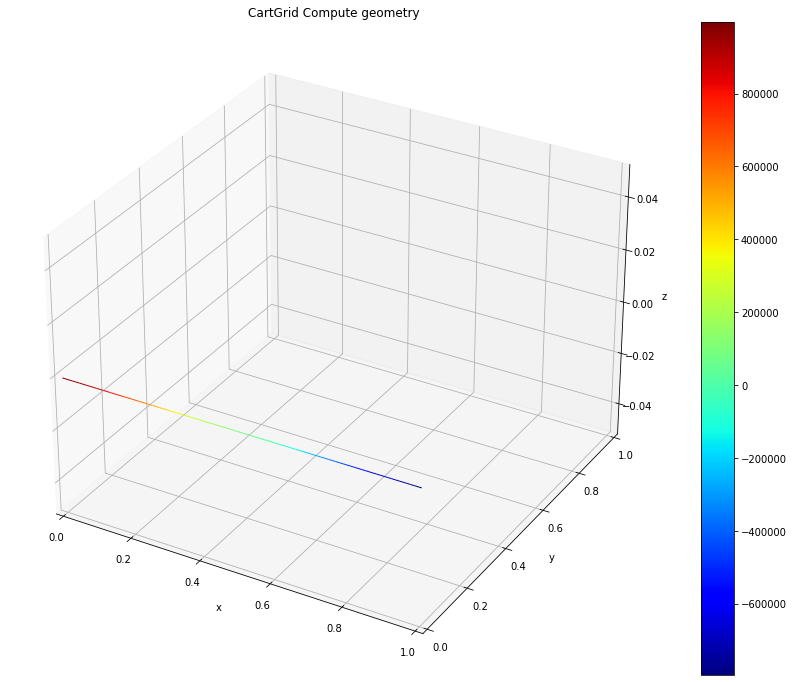

In [85]:
pp.plot_grid(g, p_tpfa, figsize=(15, 12))

[ 994981.49277748  984881.6878129   974594.50153374  963998.2982602
  952976.3156951   941418.50633502  929223.27298519  916299.07100794
  902565.85203631  887956.32638464  872417.02424708  855909.1389484
  838409.1389484   819909.1389484   800417.02424708  779956.32638464
  758565.8520363   736299.07100793  713223.27298518  689418.506335
  664976.31569508  639998.29826018  614594.50153372  588881.68781288
  562981.49277746  537018.5072225   511118.31218708  485405.49846624
  460001.70173977  435023.68430487  410581.49366495  386776.72701478
  363700.92899203  341434.14796366  320043.67361533  299582.97575288
  280090.86105157  261590.86105157  244090.86105157  227582.97575288
  212043.67361533  197434.14796366  183700.92899203  170776.72701479
  158581.49366496  147023.68430488  136001.70173978  125405.49846624
  115118.31218708  105018.50722251   94981.49277746   84881.68781289
   74594.50153373   63998.29826019   52976.31569509   41418.50633501
   29223.27298518   16299.07100793    

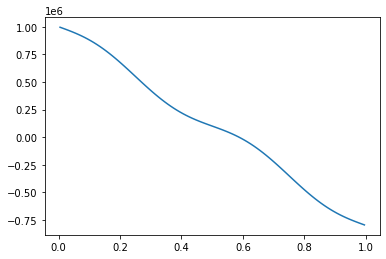

In [86]:
print(p_tpfa)
plt.plot(x,p_tpfa)